# Project1

- Your analysis here
  
---

In [42]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats



In [22]:
dog_data = pd.read_csv("Datasets/merged_dog_data.csv")
dog_data

,Unnamed: 0,id,organization_id,organization_id.1,url,species,age,gender,size,coat,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.2,organization_id.3,days_on_petfinder,today,adoptable_days_online
0,0,69339698,IL145,il145,https://www.petfinder.com/dog/maisy-69339698/i...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339698,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
1,1,69339658,IL145,il145,https://www.petfinder.com/dog/travis-kelce-693...,Dog,Baby,Male,Medium,Short,...,IL,60477,US,69339658,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
2,2,69339553,IL145,il145,https://www.petfinder.com/dog/fat-boy-69339553...,Dog,Young,Male,Small,Long,...,IL,60477,US,69339553,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
3,3,69339397,IL145,il145,https://www.petfinder.com/dog/perdita-69339397...,Dog,Young,Female,Large,Short,...,IL,60477,US,69339397,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
4,4,69339271,IL145,il145,https://www.petfinder.com/dog/marcus-69339271/...,Dog,Young,Male,Large,Medium,...,IL,60477,US,69339271,dog,IL145,il145,0.0,2023-10-17 21:42:51.576571-05:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7995,66447254,IL81,il81,https://www.petfinder.com/dog/fergie-66447254/...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447254,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7996,7996,66447260,IL81,il81,https://www.petfinder.com/dog/06-0617-66447260...,Dog,Adult,Male,Medium,NaN,...,IL,60135,US,66447260,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7997,7997,66447266,IL81,il81,https://www.petfinder.com/dog/emmitt-66447266/...,Dog,Senior,Male,Medium,NaN,...,IL,60135,US,66447266,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56
7998,7998,66447273,IL81,il81,https://www.petfinder.com/dog/bella-66447273/i...,Dog,Adult,Female,Medium,NaN,...,IL,60135,US,66447273,dog,IL81,il81,0.0,2023-10-17 21:42:51.576571-05:00,56


In [23]:
adoptable = dog_data[dog_data["status"] == "adoptable"]
adoptable = adoptable.drop_duplicates(subset=['id'])
adoptable.count()


Unnamed: 0                  3999
id                          3999
organization_id             3999
organization_id.1           3999
url                         3999
species                     3999
age                         3999
gender                      3999
size                        3999
coat                        1748
tags                        3999
name                        3999
description                 3549
organization_animal_id      1905
photos                      3999
status                      3999
status_changed_at           3999
published_at                3999
distance                    3999
breeds.primary              3999
breeds.secondary            1731
breeds.mixed                3999
breeds.unknown              3999
colors.primary              2325
colors.secondary            1226
colors.tertiary              123
attributes.special_needs    3999
attributes.shots_current    3999
environment.children        1528
environment.dogs            2141
environmen

In [24]:
adopted = dog_data[dog_data["status"] == "adopted"]
adopted = adopted.drop_duplicates(subset=['id'])
adopted.count()

Unnamed: 0                  3938
id                          3938
organization_id             3938
organization_id.1           3938
url                         3938
species                     3938
age                         3938
gender                      3938
size                        3938
coat                        1087
tags                        3938
name                        3938
description                 3114
organization_animal_id      2599
photos                      3938
status                      3938
status_changed_at           3938
published_at                3938
distance                    3938
breeds.primary              3938
breeds.secondary            1299
breeds.mixed                3938
breeds.unknown              3938
colors.primary              1144
colors.secondary             612
colors.tertiary               79
attributes.special_needs    3938
attributes.shots_current    3938
environment.children        1575
environment.dogs            1946
environmen

In [25]:
adoptable_age = adoptable.groupby("age").count()
adoptable_age = adoptable_age["id"]
adoptable_age_df = pd.DataFrame(adoptable_age)
adoptable_age_df.reset_index(inplace=True)
adoptable_age_df['% Total'] = adoptable_age_df['id'] / len(adoptable)
adoptable_age_df

,age,id,% Total
0,Adult,1593,0.398350
1,Baby,1211,0.302826
2,Senior,238,0.059515
3,Young,957,0.239310


In [26]:
adopted_age = adopted.groupby("age").count()
adopted_age = adopted_age["id"]
adopted_age_df = pd.DataFrame(adopted_age)
adopted_age_df.reset_index(inplace=True)
adopted_age_df['% Total'] = adopted_age_df['id'] / len(adopted)
adopted_age_df

,age,id,% Total
0,Adult,1892,0.480447
1,Baby,828,0.210259
2,Senior,390,0.099035
3,Young,828,0.210259


<BarContainer object of 4 artists>

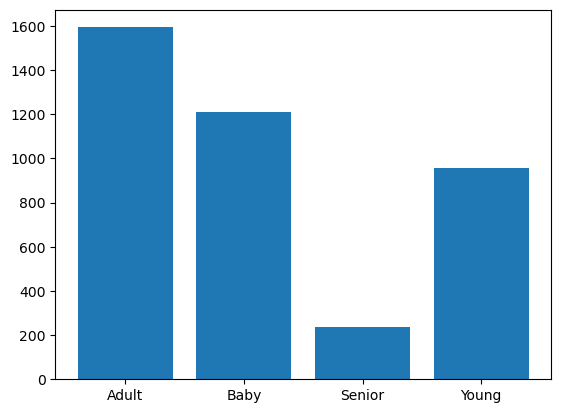

In [27]:
plt.bar(adoptable_age_df["age"], adoptable_age_df["id"], label="Adoptable")


<BarContainer object of 4 artists>

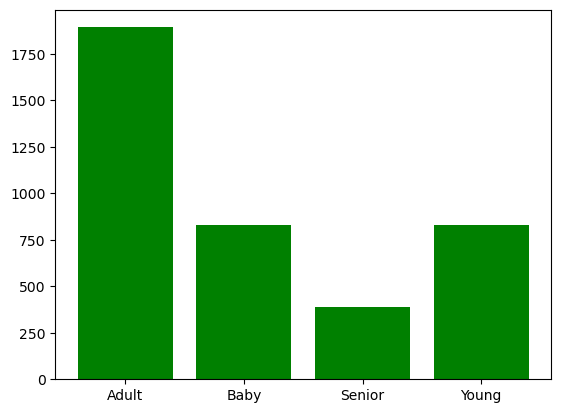

In [28]:

plt.bar(adopted_age_df["age"], adopted_age_df["id"], label="Adopted", color= "green")

In [29]:
adoptable_breed = adoptable.groupby("breeds.primary").count()
adoptable_breed = adoptable_breed["id"]
adoptable_breed_df = pd.DataFrame(adoptable_breed)
adoptable_breed_df.reset_index(inplace=True)
adoptable_breed_df['% Total'] = adoptable_breed_df['id'] / len(adoptable)
adoptable_breed_df = adoptable_breed_df.sort_values(by='id', ascending=False)
adoptable_breed_df

,breeds.primary,id,% Total
107,Pit Bull Terrier,537,0.134284
96,Mixed Breed,461,0.115279
87,Labrador Retriever,310,0.077519
40,Chihuahua,190,0.047512
70,German Shepherd Dog,178,0.044511
...,...,...,...
106,Petit Basset Griffon Vendeen,1,0.000250
57,English Cocker Spaniel,1,0.000250
64,Field Spaniel,1,0.000250
113,Presa Canario,1,0.000250


In [30]:
adopted_breed = adopted.groupby("breeds.primary").count()
adopted_breed = adopted_breed["id"]
adopted_breed_df = pd.DataFrame(adopted_breed)
adopted_breed_df.reset_index(inplace=True)
adopted_breed_df['% Total'] = adopted_breed_df['id'] / len(adopted)
adopted_breed_df = adopted_breed_df.sort_values(by='id', ascending=False)
adopted_breed_df


,breeds.primary,id,% Total
88,Labrador Retriever,394,0.100051
46,Chihuahua,335,0.085069
99,Mixed Breed,245,0.062214
141,Terrier,217,0.055104
71,German Shepherd Dog,176,0.044693
...,...,...,...
119,Redbone Coonhound,1,0.000254
66,Finnish Spitz,1,0.000254
65,Feist,1,0.000254
126,Scottish Terrier,1,0.000254


In [52]:
test_adoptable_breed = adoptable_breed_df["id"]
test_adopted_breed = adopted_breed_df["id"]

stats.ttest_ind(test_adoptable_breed, test_adopted_breed, equal_var=False)


TtestResult(statistic=0.12727162501337044, pvalue=0.8988127224237643, df=292.9856003519189)

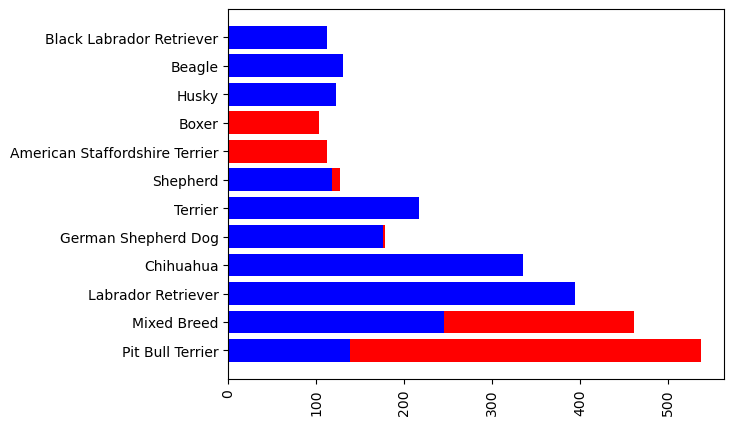

In [63]:
adoptable_breed_plot = adoptable_breed_df[["breeds.primary", "id"]][:10]
adopted_breed_plot = adopted_breed_df[["breeds.primary", "id"]][:10]

# plt.subplot(2, 1, 2)
# plt.bar(adoptable_breed_plot, [20] * len(adoptable_breed_data), density=True, alpha=0.7, label="adoptable_breed")
# plt.bar(adopted_breed_plot, [20] * len(adopted_breed_data), density=True, alpha=0.7, label="adopted_breed")
# # plt.axvline(adoptable_breed_plot.mean(), color='k', linestyle='dashed', linewidth=1)
# # plt.axvline(adopted_breed_plot.mean(), color='k', linestyle='dashed', linewidth=1)
# plt.xlabel("Breed")
# plt.ylabel("Count")
# plt.legend()
# plt.show()

plt.barh(adoptable_breed_plot["breeds.primary"], adoptable_breed_plot["id"], label="Adoptable", color ="red")
plt.barh(adopted_breed_plot["breeds.primary"], adopted_breed_plot["id"], label="Adopted", color = "blue")
plt.xticks(rotation=90)
plt.show()


In [31]:
adoptable_color = adoptable.groupby("colors.primary").count()
adoptable_color = adoptable_color["id"]
adoptable_color_df = pd.DataFrame(adoptable_color)
adoptable_color_df.reset_index(inplace=True)
adoptable_color_df['% Total'] = adoptable_color_df['id'] / len(adoptable)
adoptable_color_df = adoptable_color_df.sort_values(by='id', ascending=False)
adoptable_color_df

,colors.primary,id,% Total
2,Black,623,0.155789
13,White / Cream,411,0.102776
14,Yellow / Tan / Blond / Fawn,242,0.060515
4,Brown / Chocolate,221,0.055264
3,Brindle,172,0.043011
12,"Tricolor (Brown, Black, & White)",132,0.033008
6,Gray / Blue / Silver,123,0.030758
10,Red / Chestnut / Orange,115,0.028757
0,Apricot / Beige,104,0.026007
1,Bicolor,102,0.025506


In [32]:
adopted_color = adopted.groupby("colors.primary").count()
adopted_color = adopted_color["id"]
adopted_color_df = pd.DataFrame(adopted_color)
adopted_color_df.reset_index(inplace=True)
adopted_color_df['% Total'] = adopted_color_df['id'] / len(adopted)
adopted_color_df = adopted_color_df.sort_values(by='id', ascending=False)
adopted_color_df

,colors.primary,id,% Total
2,Black,297,0.075419
13,White / Cream,177,0.044947
12,"Tricolor (Brown, Black, & White)",116,0.029457
14,Yellow / Tan / Blond / Fawn,116,0.029457
4,Brown / Chocolate,80,0.020315
0,Apricot / Beige,68,0.017268
10,Red / Chestnut / Orange,63,0.015998
3,Brindle,56,0.014220
1,Bicolor,53,0.013459
6,Gray / Blue / Silver,45,0.011427


In [51]:
test_adoptable_color = adoptable_color_df["id"]
test_adopted_color = adopted_color_df["id"]

stats.ttest_ind(test_adoptable_color, test_adopted_color, equal_var=False)

TtestResult(statistic=1.6342883011557583, pvalue=0.1181561385195702, df=19.60289355150065)

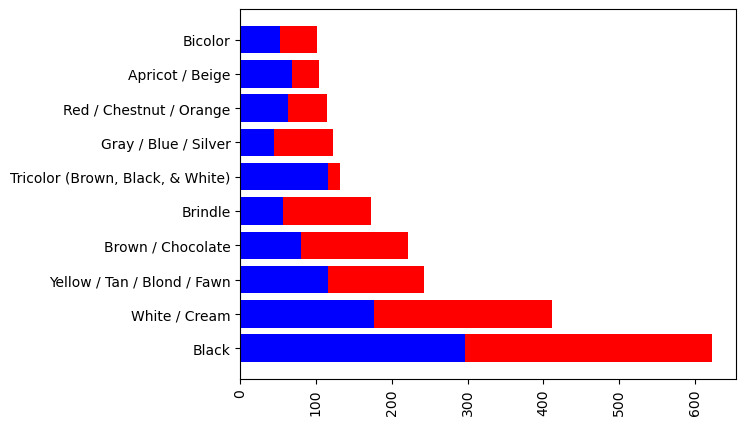

In [64]:
adoptable_color_plot = adoptable_color_df[["colors.primary", "id"]][:10]
adopted_color_plot = adopted_color_df[["colors.primary", "id"]][:10]

plt.barh(adoptable_color_plot["colors.primary"], adoptable_color_plot["id"], label="Adoptable", color ="red")
plt.barh(adopted_color_plot["colors.primary"], adopted_color_plot["id"], label="Adopted", color = "blue")
plt.xticks(rotation=90)
plt.show()

In [33]:
adoptable_tags = adoptable.groupby("tags").count()
adoptable_tags = adoptable_tags["id"]
adoptable_tags_df = pd.DataFrame(adoptable_tags)
adoptable_tags_df.reset_index(inplace=True)
adoptable_tags_df['% Total'] = adoptable_tags_df['id'] / len(adoptable)
adoptable_tags_df = adoptable_tags_df.sort_values(by='id', ascending=False)
adoptable_tags_df

,tags,id,% Total
1067,[],2475,0.618905
665,"['Friendly', 'Affectionate']",60,0.015004
642,"['Friendly', 'Affectionate', 'Playful']",31,0.007752
893,"['Friendly', 'Playful']",16,0.004001
547,"['Friendly', 'Affectionate', 'Playful', 'Funny...",15,0.003751
...,...,...,...
379,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250
380,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250
382,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250
383,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000250


In [34]:
adopted_tags = adopted.groupby("tags").count()
adopted_tags = adopted_tags["id"]
adopted_tags_df = pd.DataFrame(adopted_tags)
adopted_tags_df.reset_index(inplace=True)
adopted_tags_df['% Total'] = adopted_tags_df['id'] / len(adopted)
adopted_tags_df = adopted_tags_df.sort_values(by='id', ascending=False)
adopted_tags_df

,tags,id,% Total
429,[],3249,0.825038
298,"['Friendly', 'Affectionate']",49,0.012443
286,"['Friendly', 'Affectionate', 'Playful']",30,0.007618
117,"['Friendly', 'Affectionate', 'Gentle']",14,0.003555
339,"['Friendly', 'Loyal', 'Playful', 'Smart', 'Cur...",12,0.003047
...,...,...,...
147,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254
146,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254
145,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254
144,"['Friendly', 'Affectionate', 'Loyal', 'Gentle'...",1,0.000254


In [35]:
adoptable_size = adoptable.groupby("size").count()
adoptable_size = adoptable_size["id"]
adoptable_size_df = pd.DataFrame(adoptable_size)
adoptable_size_df.reset_index(inplace=True)
adoptable_size_df['% Total'] = adoptable_size_df['id'] / len(adoptable)
adoptable_size_df = adoptable_size_df.sort_values(by='id', ascending=False)
adoptable_size_df

,size,id,% Total
2,Medium,1864,0.466117
1,Large,1378,0.344586
3,Small,720,0.180045
0,Extra Large,37,0.009252


In [36]:
adopted_size = adopted.groupby("size").count()
adopted_size = adopted_size["id"]
adopted_size_df = pd.DataFrame(adopted_size)
adopted_size_df.reset_index(inplace=True)
adopted_size_df['% Total'] = adopted_size_df['id'] / len(adopted)
adopted_size_df = adopted_size_df.sort_values(by='id', ascending=False)
adopted_size_df

,size,id,% Total
2,Medium,2079,0.527933
3,Small,987,0.250635
1,Large,843,0.214068
0,Extra Large,29,0.007364


In [37]:
adoptable_gender = adoptable.groupby("gender").count()
adoptable_gender = adoptable_gender["id"]
adoptable_gender_df = pd.DataFrame(adoptable_gender)
adoptable_gender_df.reset_index(inplace=True)
adoptable_gender_df['% Total'] = adoptable_gender_df['id'] / len(adoptable)
adoptable_gender_df


,gender,id,% Total
0,Female,1980,0.495124
1,Male,2019,0.504876


In [38]:
adopted_gender = adopted.groupby("gender").count()
adopted_gender = adopted_gender["id"]
adopted_gender_df = pd.DataFrame(adopted_gender)
adopted_gender_df.reset_index(inplace=True)
adopted_gender_df['% Total'] = adopted_gender_df['id'] / len(adopted)
adopted_gender_df


,gender,id,% Total
0,Female,1832,0.465211
1,Male,2106,0.534789


In [50]:
test_adoptable = adoptable_gender_df["id"]
test_adopted = adopted_gender_df["id"]

stats.ttest_ind(test_adoptable, test_adopted, equal_var=False)

TtestResult(statistic=0.2204062750186586, pvalue=0.8608025691949349, df=1.0405023167870215)

In [40]:
adoptable_color_days = adoptable.groupby('colors.primary')['adoptable_days_online'].mean()

adoptable_count = adoptable.groupby('colors.primary')['id'].count()
adoptable_color_days_df = pd.concat([adoptable_color_days, adoptable_count], axis=1)

adoptable_color_days_df.reset_index(inplace=True)
adoptable_color_days_df = adoptable_color_days_df.sort_values(by='id', ascending=False)

adoptable_color_days_df


,colors.primary,adoptable_days_online,id
2,Black,50.470305,623
13,White / Cream,44.462287,411
14,Yellow / Tan / Blond / Fawn,51.636364,242
4,Brown / Chocolate,58.031674,221
3,Brindle,56.139535,172
12,"Tricolor (Brown, Black, & White)",47.477273,132
6,Gray / Blue / Silver,58.341463,123
10,Red / Chestnut / Orange,59.156522,115
0,Apricot / Beige,48.990385,104
1,Bicolor,46.696078,102


In [41]:
adopted_color_days = adopted.groupby('colors.primary')['days_on_petfinder'].mean()

adopted_count = adopted.groupby('colors.primary')['id'].count()
adopted_color_days_df = pd.concat([adopted_color_days, adopted_count], axis=1)

adopted_color_days_df.reset_index(inplace=True)
adopted_color_days_df = adopted_color_days_df.sort_values(by='id', ascending=False)

adopted_color_days_df

,colors.primary,days_on_petfinder,id
2,Black,12.835017,297
13,White / Cream,13.197740,177
12,"Tricolor (Brown, Black, & White)",12.991379,116
14,Yellow / Tan / Blond / Fawn,12.370690,116
4,Brown / Chocolate,11.612500,80
0,Apricot / Beige,9.382353,68
10,Red / Chestnut / Orange,13.714286,63
3,Brindle,13.482143,56
1,Bicolor,13.490566,53
6,Gray / Blue / Silver,12.711111,45
